<a href="https://colab.research.google.com/github/JohnTong12/Bank-Customer-Churn/blob/main/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project Goal
- The Goal of the Project is to predict whether a customer will churn in the next 6 months

In [22]:
# from google.colab import drive
# drive.mount('/content/drive',timeout_ms=60000)

#### Problem Definition
- Given a Bank customer, can we build a classification model which can determine whether they will leave in the next 6 months or not?

In [23]:
# !pip install ydata-profiling

In [24]:
# from google.colab import drive
# drive.mount('/content/drive')

### ABOUT THE DATA SET
- The data set was gotten from kaggle :  [Link of the churn kaggle dataset](https://www.kaggle.com/datasets/barelydedicated/bank-customer-churn-modeling/data)

- About the data set features
   * 1. RowNumber: Represents the row number in the dataset.
   * 2. CustomerId: Unique identifier for each customer.
   * 3. Surname: Customer’s last name.
   * 4. CreditScore: Credit score of the customer
   * 5. Geography: Customer’s country of residence
   * 6. Gender: Customer’s gender.
   * 7. Age: Customer’s age.
   * 8. Tenure: Number of years the customer has been with     the bank.   
   * 9. Balance: Account balance of the customer
   * 10. NumOfProducts: Number of bank products the customer uses.
   * 11. HasCrCard: Whether the customer has a credit card (1 for yes, 0 for no).
   * 12. IsActiveMember: Whether the customer is an active member (1 for yes, 0 for no).
   * 13. EstimatedSalary: Estimated salary of the customer
   * 14. Exited: Whether the customer has churned (1 for yes, 0 for no).


##### DATA IMPORTATION

In [25]:
# !pip install category-encoders

In [26]:
## importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler , OneHotEncoder,QuantileTransformer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import  SVC
from lightgbm import LGBMClassifier
from yellowbrick.target import class_balance
from category_encoders import BinaryEncoder
from yellowbrick.target import class_balance
from yellowbrick.classifier import classification_report
from catboost import CatBoostClassifier
plt.rcParams['axes.facecolor']="#DCDCDC"
sns.set_context("notebook")
import statsmodels as sm
from statsmodels.api import Logit
pd.set_option('display.max_columns',None)
from sklearn.metrics import roc_curve,roc_auc_score



In [27]:
## loading the data
churn_data = pd.read_csv('/content/Churn_Modelling.csv')

In [28]:
## checking the first five rows
churn_data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [29]:
## last five
churn_data.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

In [30]:
## checking the data shape
churn_data.shape

(10000, 14)

In [31]:
## cheecking for general info
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [32]:
## validation the data types
churn_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [33]:
## column names
churn_data.columns.to_list()

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [34]:
## checking for data describtion  ~ descriptive stats
churn_data.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

#### observations made from the numeric data
* There 20.37% customer  churn rate whereas  79.63% customers stayed
* The customer base shows high financial diversity (wide range in balances and salaries)
* Large spread in balances and salaries indicates diverse customer base
* Most customers have only 1-2 products
* Only 51.51% are active members
* Mean age is 38.9 years

In [35]:
### checking for missing values
churn_data.isnull().mean()*100

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [36]:
## checking for duplicates
churn_data.duplicated(keep='first').sum()

0

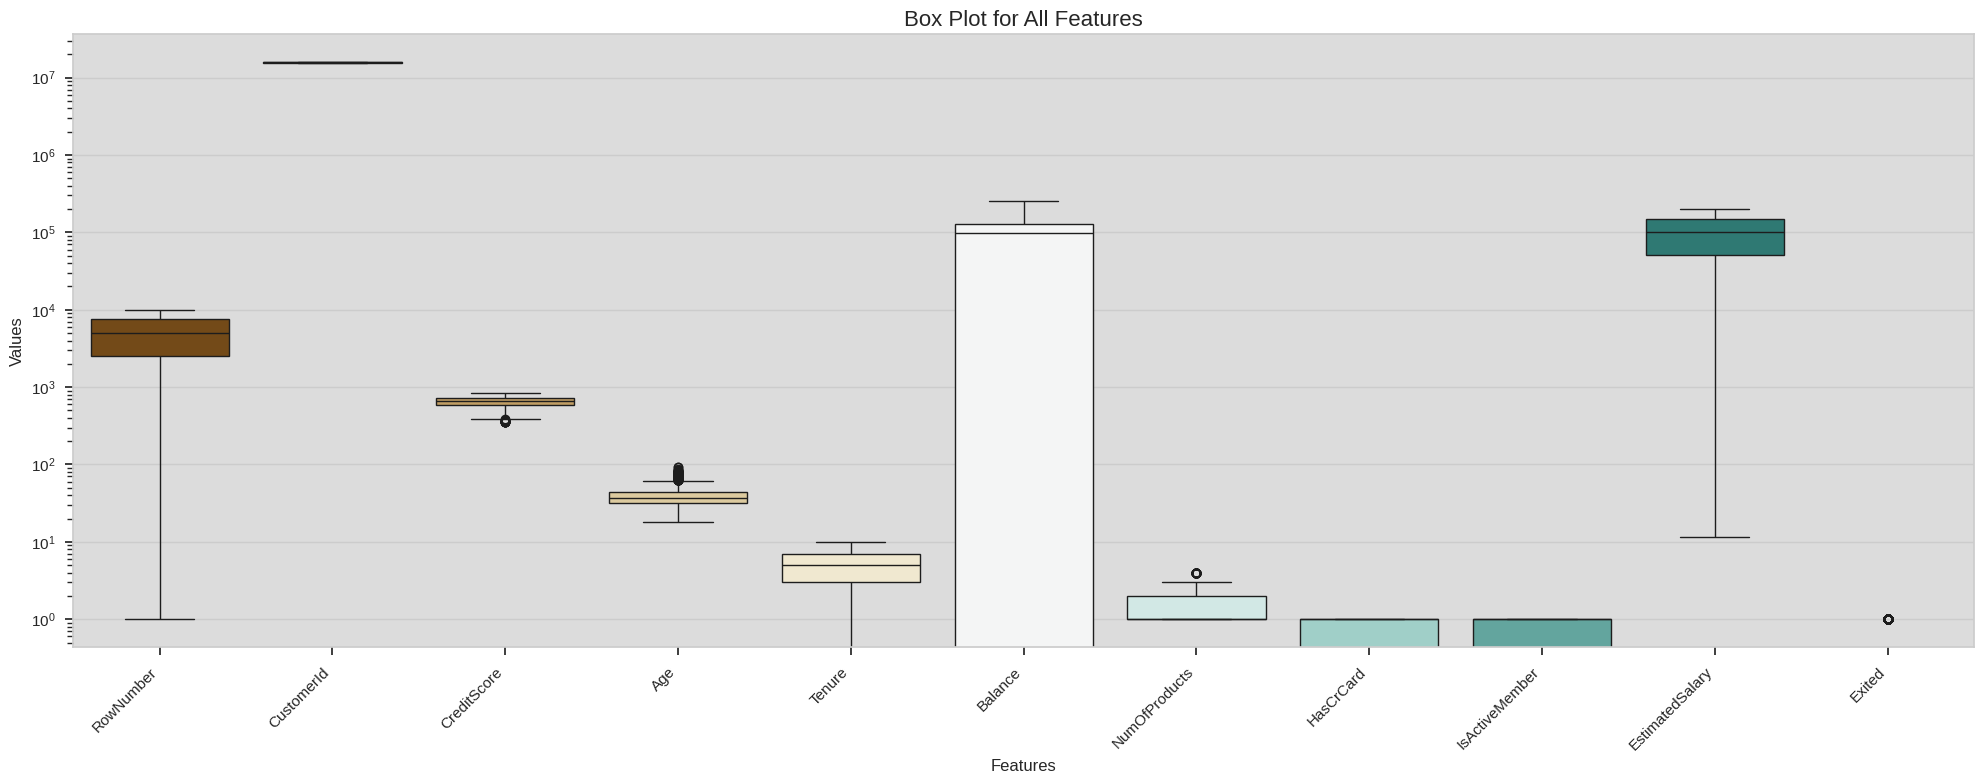

In [37]:
# Creating a boxplot with logarithmic scale for the y-axis
plt.figure(figsize=(20, 8))
ax = sns.boxplot(data=churn_data, palette='BrBG')

# Set plot title and labels
plt.title('Box Plot for All Features', fontsize=16)
plt.xlabel('Features')
plt.ylabel('Values')

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Improve layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save and show plot
plt.show()

#### Key insights from the visual
* it seems like the data doesnot have alot of outliers
* Age and credit score seem to have
* Num products seem to als one


#### EXPLRATORY DATA ANALYSIS

In [38]:
### lets start by building the pandas profiler
## initializing the profile report
from ydata_profiling import ProfileReport
profile_report =  ProfileReport(
    churn_data,
    title="Customized Report",
    minimal=False,
    explorative=True,


)

profile_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### key observations of the pandas Profiler
* Age has a moderate positive correlation (0.375)
* Number of Products has a notable correlation (0.387)
* There is aPositive correlation between Age and Balance , as the customerss get older , there account balances tend to increase
* Longer Tenure customerss usallly have higher balances

### DATA DISTRIBUTIONS



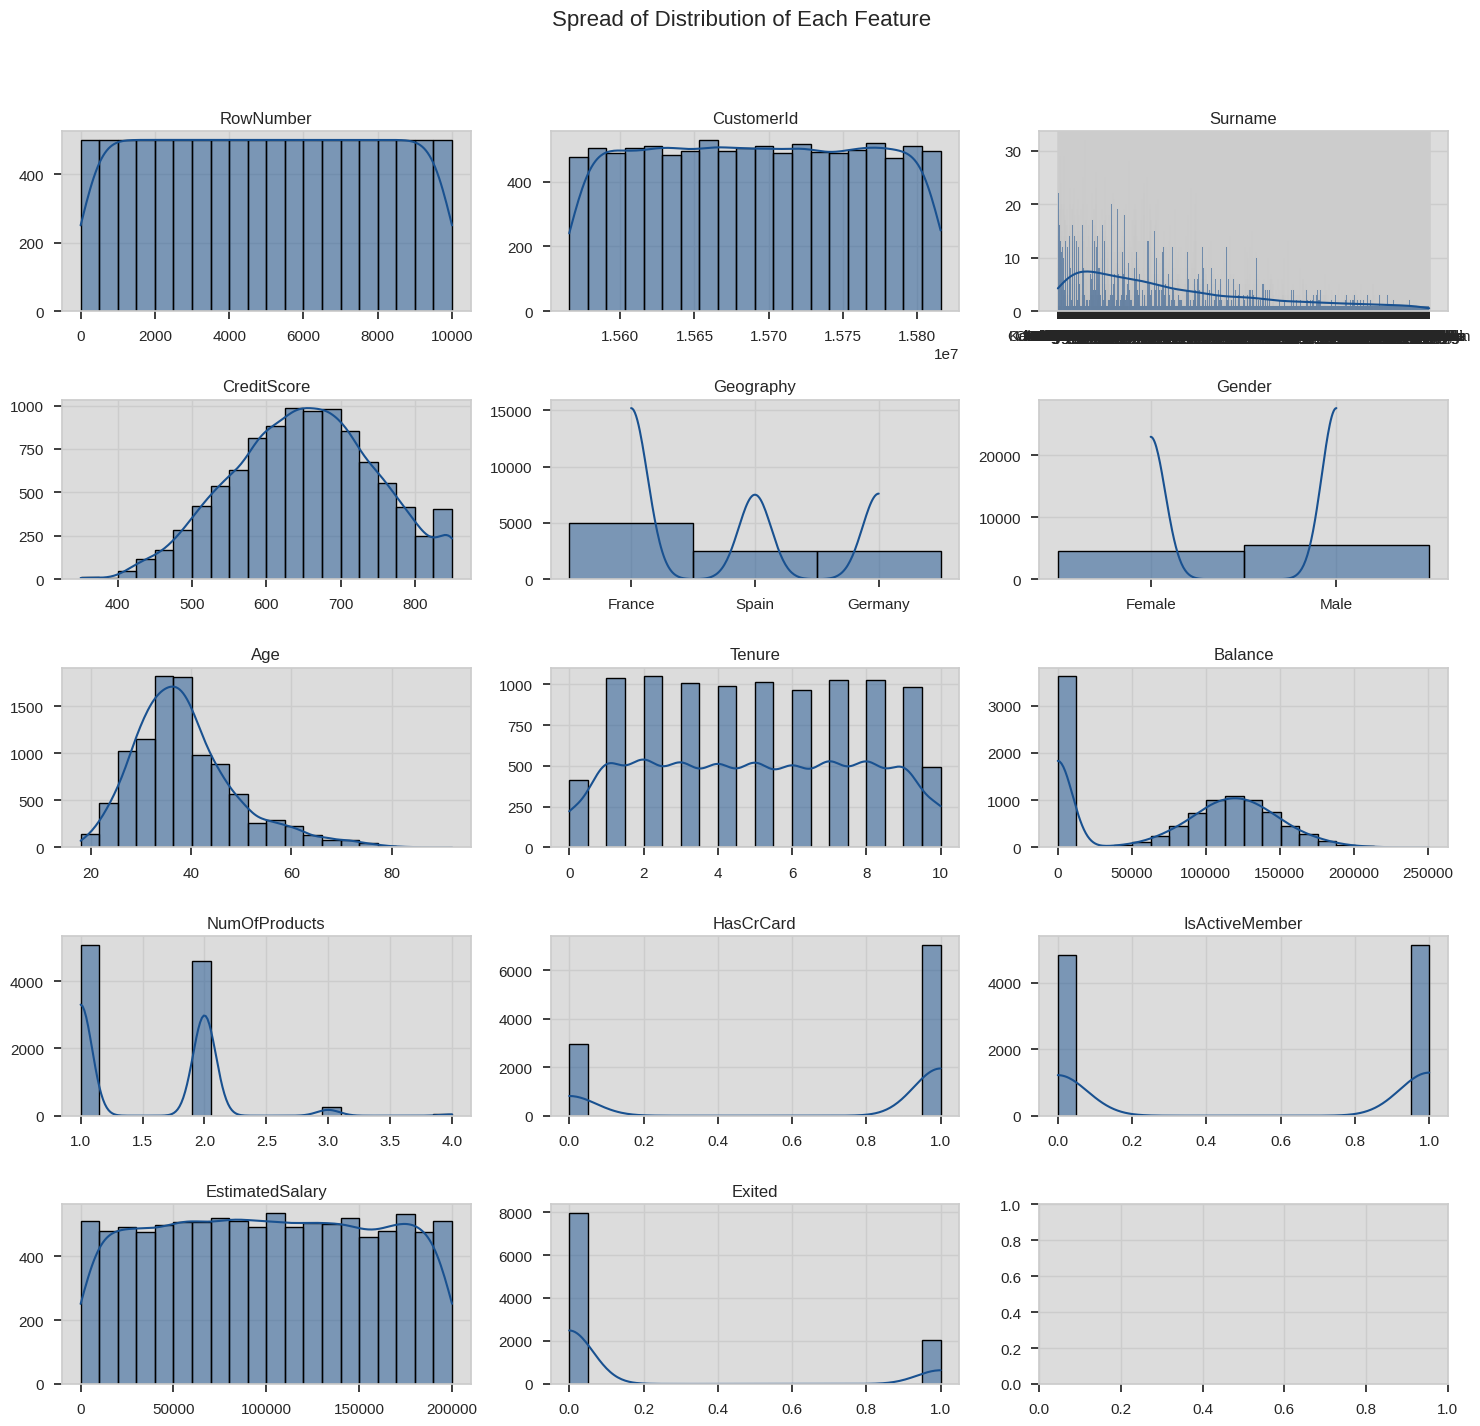

In [39]:
# Generating plots
fig, axes = plt.subplots(5, 3, figsize=(15, 15))  # Adjust number of rows and columns as needed
fig.suptitle('Spread of Distribution of Each Feature', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, column in enumerate(churn_data.columns):
    if i < len(axes):  # Ensure we don't try to plot more columns than we have axes for
        sns.histplot(churn_data[column], bins=20, kde=True, ax=axes[i], color='#195190')
        axes[i].set_title(column)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save and show plot
plt.show()

### key observations from the Numeric plots
* These features are evenly distributed, indicating that they are unique identifiers and likely irrelevant for predictive modeling or analysis.
* he data is normally distributed with a slight left skew. Most customers have credit scores between 500 and 750, with a few outliers on both ends.
* The majority of customers are from France, followed by Spain and Germany.
* There is a nearly equal distribution between male and female customers
* The distribution is slightly right-skewed, with most customers aged between 25 and 50
* There are fewer older customers (above 60)
* The tenure appears evenly distributed across most levels, but the distribution has slight
* The balance shows a bimodal distribution, with a significant number of customers at zero balance.

### Class Imbalance

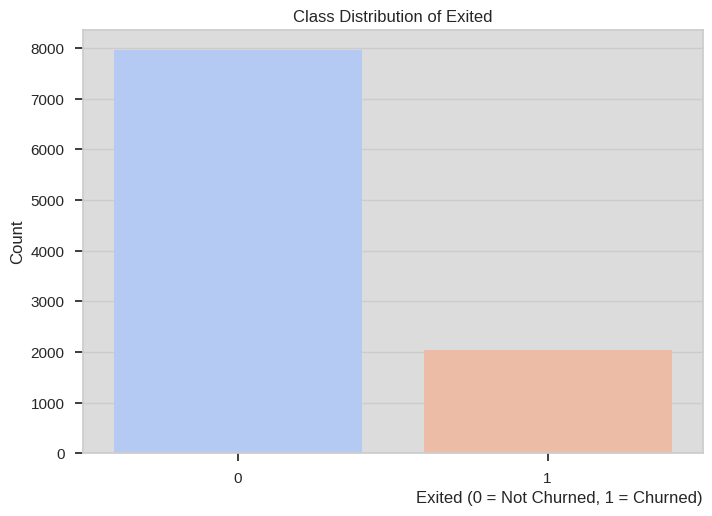

In [40]:

# Bar plot for `Exited` distribution
sns.countplot(data=churn_data, x='Exited', palette='coolwarm')
plt.title('Class Distribution of Exited')
plt.xlabel('Exited (0 = Not Churned, 1 = Churned)',loc='right')
plt.ylabel('Count')
plt.show()

In [41]:
## percentage distribution
# Percentage distribution
churn_data['Exited'].value_counts(normalize=True) * 100


Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

In [42]:
## diplaying data
churn_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [43]:
####  FEATURE EGINEERING

def create_interaction_features(df):

    # Create a copy of the dataframe
    df_interactions = df.copy()

    # 1. Age-based Interactions
    df_interactions['Age_Balance_Interaction'] = df['Age'] * df['Balance']
    df_interactions['Age_NumProducts_Interaction'] = df['Age'] * df['NumOfProducts']

    # 2. Credit Score Interactions
    df_interactions['CreditScore_Balance_Interaction'] = df['CreditScore'] * df['Balance']
    df_interactions['CreditScore_EstimatedSalary_Interaction'] = df['CreditScore'] * df['EstimatedSalary']

    # 3. Tenure-based Interactions
    df_interactions['Tenure_NumProducts_Interaction'] = df['Tenure'] * df['NumOfProducts']
    df_interactions['Tenure_Balance_Interaction'] = df['Tenure'] * df['Balance']

    # 4. Categorical Interactions
    # One-hot encode categorical variables first
    categorical_features = ['Gender', 'Geography', 'HasCrCard', 'IsActiveMember','NumOfProducts']
    df_encoded = pd.get_dummies(df, columns=categorical_features, prefix='', prefix_sep='')

    # Interaction with Age
    for cat_col in df_encoded.columns:
        if cat_col.startswith(tuple(categorical_features)):
            df_interactions[f'Age_{cat_col}_Interaction'] = df['Age'] * df_encoded[cat_col]

    # 5. Polynomial Features
    df_interactions['Age_Squared'] = df['Age'] ** 2
    df_interactions['Balance_Squared'] = df['Balance'] ** 2
    df_interactions['CreditScore_Squared'] = df['CreditScore'] ** 2

    # 6. Logarithmic Transformations (adding small constant to avoid log(0))
    df_interactions['Log_Balance'] = np.log1p(df['Balance'])
    df_interactions['Log_EstimatedSalary'] = np.log1p(df['EstimatedSalary'])

    # 7. Ratio-based Features
    df_interactions['Balance_to_EstimatedSalary_Ratio'] = df['Balance'] / (df['EstimatedSalary'] + 1)
    df_interactions['NumProducts_to_Tenure_Ratio'] = df['NumOfProducts'] / (df['Tenure'] + 1)

    ## BalanceCategory featur
    df_interactions['BalanceCategory'] = df_interactions['Balance'].apply(lambda x: 'Zero Balance' if x == 0 else 'Non-Zero Balance')

    ## Region churn Rate
    df_interactions['RegionChurnRate'] = df_interactions.groupby('Geography')['Exited'].transform('mean')

    ## Gender churn rate
    df_interactions['RegionChurnRate'] = df_interactions.groupby('Gender')['Exited'].transform('mean')




    return df_interactions


    # Create interaction features
churn_data_egineered = create_interaction_features(churn_data)



In [44]:
## checking the data
churn_data_egineered.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Age_Balance_Interaction  \
0        101348.88       1                     0.00   
1        112542.58       0               3436122.26   
2        113931.57       1               6705753.60   
3         93826.63       0                     0.00   
4         79084.10       0               5396965.26   

   Age_NumProducts_Interaction  CreditScore_Balance_Interaction  \
0                           42                     0.000000e+00   
1                           41                     5.095518e+07   
2                          126                     8.014972e+07   
3                           78                     0.000000e+00   
4                           43                     1.066842e+08   

   CreditScore_EstimatedSalary_Interaction  Tenure_NumProducts_Interaction  \
0                              62734956.72                               2   
1                              68425888.64                               1   
2                              57193648.14                              24   
3                              65584814.37                               2   
4                              67221485.00                               2   

   Tenure_Balance_Interaction  Age_Squared  Balance_Squared  \
0                        0.00         1764     0.000000e+00   
1                    83807.86         1681     7.023757e+09   
2                  1277286.40         1764     2.549157e+10   
3                        0.00         1521     0.000000e+00   
4                   251021.64         1849     1.575297e+10   

   CreditScore_Squared  Log_Balance  Log_EstimatedSalary  \
0               383161     0.000000            11.526334   
1               369664    11.336294            11.631096   
2               252004    11.980813            11.643362   
3               488601     0.000000            11.449215   
4               722500    11.740155            11.278280   

   Balance_to_EstimatedSalary_Ratio  NumProducts_to_Tenure_Ratio  \
0                          0.000000                     0.333333   
1                          0.744670                     0.500000   
2                          1.401362                     0.333333   
3                          0.000000                     1.000000   
4                          1.587035                     0.333333   

    BalanceCategory  RegionChurnRate  
0      Zero Balance         0.250715  
1  Non-Zero Balance         0.250715  
2  Non-Zero Balance         0.250715  
3      Zero Balance         0.250715  
4  Non-Zero Balance         0.250715

In [45]:
## checking for the shape now
churn_data_egineered.shape

(10000, 29)

In [46]:
## dropping features that will not make sense  as they dont meaning for modelling
churn_data_egineered = churn_data_egineered.drop(columns=['RowNumber','CustomerId','Surname'])

In [47]:
## churn_data
churn_data_egineered

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0             1               1        101348.88       1   
1             0               1        112542.58       0   
2             1               0        113931.57       1   
3             0               0         93826.63       0   
4             1               1         79084.10       0   
...         ...             ...              ...     ...   
9995          1               0         96270.64       0   
9996          1               1        101699.77       0   
9997          0               1         42085.58       1   
9998          1               0         92888.52       1   
9999          1               0         38190.78       0   

      Age_Balance_Interaction  Age_NumProducts_Interaction  \
0                        0.00                           42   
1                  3436122.26                           41   
2                  6705753.60                          126   
3                        0.00                           78   
4                  5396965.26                           43   
...                       ...                          ...   
9995                     0.00                           78   
9996               2007936.35                           35   
9997                     0.00                           36   
9998               3153163.02                           84   
9999               3643998.12                           28   

      CreditScore_Balance_Interaction  \
0                        0.000000e+00   
1                        5.095518e+07   
2                        8.014972e+07   
3                        0.000000e+00   
4                        1.066842e+08   
...                               ...   
9995                     0.000000e+00   
9996                     2.960272e+07   
9997                     0.000000e+00   
9998                     5.795814e+07   
9999                     1.030731e+08   

      CreditScore_EstimatedSalary_Interaction  Tenure_NumProducts_Interaction  \
0                                 62734956.72                               2   
1                                 68425888.64                               1   
2                                 57193648.14                              24   
3                                 65584814.37                               2   
4                                 67221485.00                               2   
...                                       ...                             ...   
9995                              74224663.44                              10   
9996                              52477081.32                              10   
9997                              29838676.22                               7   
9998                              71709937.44                               6   
9999                              30247097.76                               4   

      Tenure_Balance_Interaction  Age_Squared  Balance_Squared  \
0                           0.00         1764     0.000000e+00   
1    

In [48]:
## checking for info
churn_data_egineered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   CreditScore                              10000 non-null  int64  
 1   Geography                                10000 non-null  object 
 2   Gender                                   10000 non-null  object 
 3   Age                                      10000 non-null  int64  
 4   Tenure                                   10000 non-null  int64  
 5   Balance                                  10000 non-null  float64
 6   NumOfProducts                            10000 non-null  int64  
 7   HasCrCard                                10000 non-null  int64  
 8   IsActiveMember                           10000 non-null  int64  
 9   EstimatedSalary                          10000 non-null  float64
 10  Exited                                   10000 

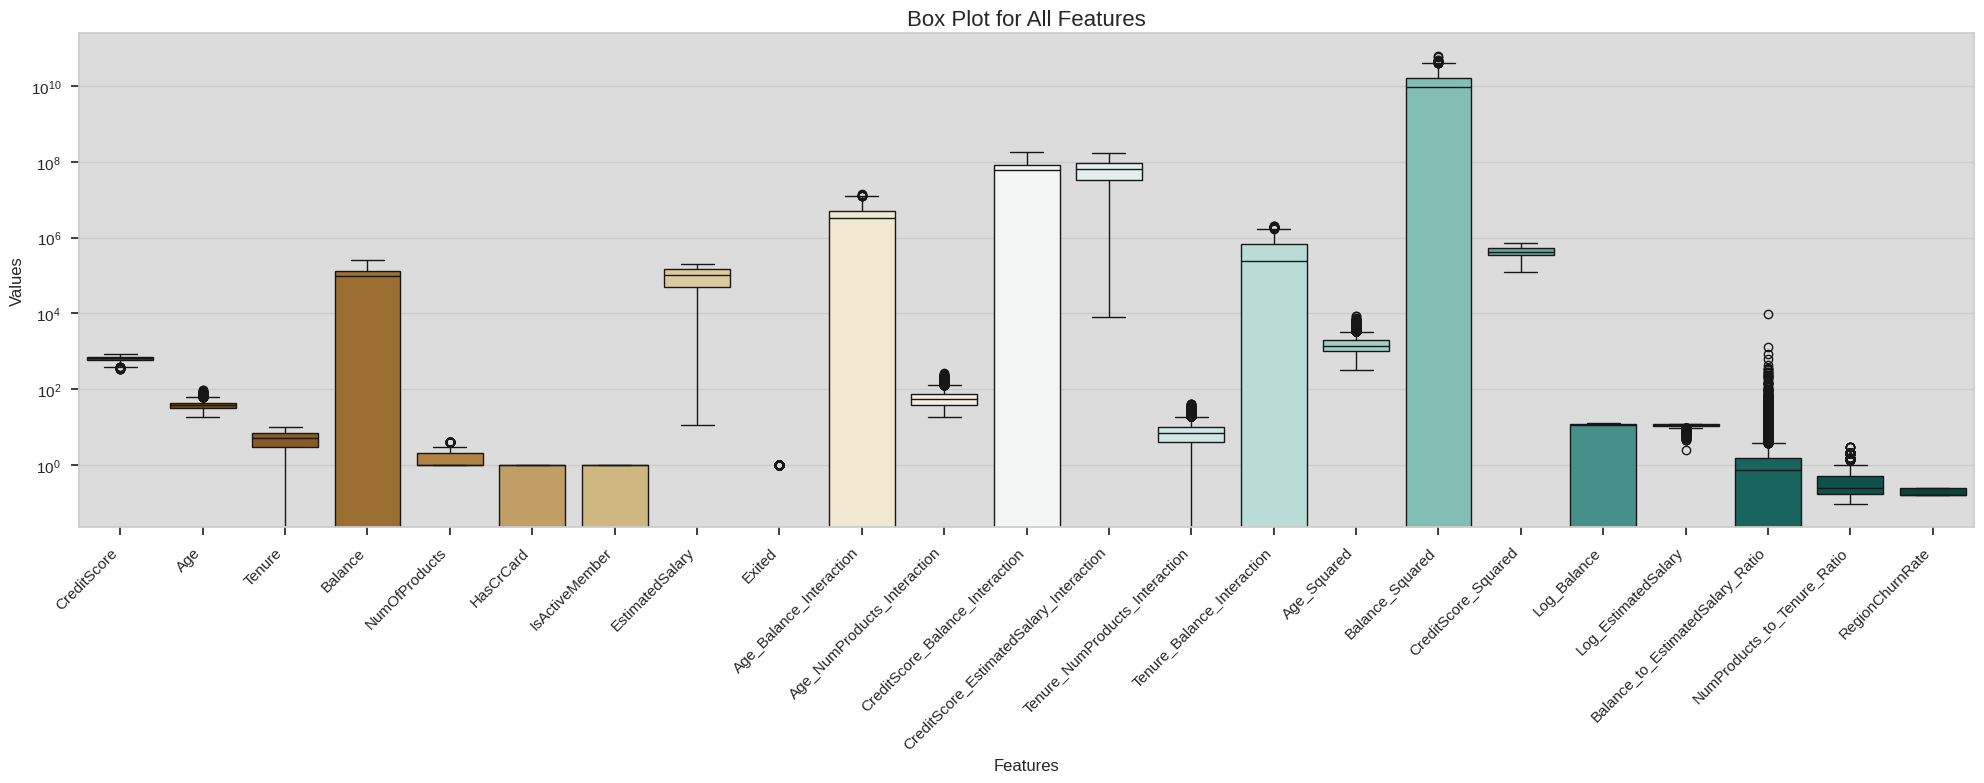

In [49]:
## data distribution
# Creating a boxplot with logarithmic scale for the y-axis
plt.figure(figsize=(20, 8))
ax = sns.boxplot(data=churn_data_egineered, palette='BrBG')

# Set plot title and labels
plt.title('Box Plot for All Features', fontsize=16)
plt.xlabel('Features')
plt.ylabel('Values')

# Set y-axis to logarithmic scale
ax.set_yscale('log')

# Improve layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save and show plot
plt.show()

### Key Insights
* Interaction terms like CreditScore_Balance_Interaction, NumProducts_to_Tenure_Ratio exhibit noticeable outliers.
* Interaction terms like Age_Balance_Interaction, CreditScore_EstimatedSalary_Ratio, and squared terms (e.g., Age_Squared, Balance_Squared) appear to extend the feature space by capturing nonlinear or combined effects.


### The Pandas Profiler to explain interactions saving us time
